#Importation des librairies et bibliothéques

In [1]:
# Importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from time import process_time
from time import perf_counter
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Prétraitement des données :

In [2]:
# chargement des données
data = pd.read_csv("brca.csv")
data.head()  # afficher les 5 premieres lignes de notre dataset

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [3]:
# Pretraitement des données
data.drop(["Unnamed: 0"],axis=1,inplace=True) # effacer toute la colonne "Unnamed: 0"
print(data.shape)
data.head()

(569, 31)


,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [4]:
print(data["y"].unique()) # Affichage des sorties qui existent (2 sorties : "M" et "B")
data["y"].value_counts() # compter les "M" et les "B"

['B' 'M']


B    357
M    212
Name: y, dtype: int64

In [5]:
data.y = [1 if each == "M" else 0 for each in data.y] # on remplace les characteres par des valeurs binaires 1 si "m", 0 si "B"
y = data.y.values
x_data = data.drop(["y"], axis=1) # on efface la colonne des y
x_data.head() # x_data devient une matrice de dimension (5x30)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [6]:
# normalisation des données
x = (x_data - x_data.min())/(x_data.max() - x_data.min()).values
x = x.values
type(x)
#y

numpy.ndarray

In [7]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Transposer les ensembles d'entraînement et de test
x_train = x_train.T
x_test = x_test.T
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

print("x_train:", x_train.shape) # (30, 455)
print("x_test:", x_test.shape) # (30, 114)
print("y_train:", y_train.shape) # (455, 1)
print("y_test:", y_test.shape) # (114, 1)



x_train: (30, 455)
x_test: (30, 114)
y_train: (455,)
y_test: (114,)


# -Entrainer un modéle de regréssion logistique

## - Méthode de gradient stochastique

In [8]:
# Initialisation des parametres
def init_param(n):
    w = np.full((n, 1), 0.1) # (30,1)
    b = 0.0
    return w, b

# Fonction sigmoïde
def sigmoid(x):
    f_x = 1 / (1 + np.exp(-x))
    return f_x

# Propagation avant et arrière
def forward_backward_propagation(w, b, x_train, y_train):
    # Propagation avant (calcul de la fonction de cout)
    dim = x_train.shape[1]
    z = np.dot(w.T, x_train) + b
    y_pred = sigmoid(z)
    cout = (-1 / dim) * np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))

    # Rétropropagation (calcul du gradient)
    dw = (1 / dim) * np.dot(x_train, (y_pred - y_train).T)
    db = (1 / dim) * np.sum(y_pred - y_train)
    gradients = {"dw": dw, "db": db}


    return cout, gradients




In [9]:
# Descente de gradient stochastique
def SGD(w, b, x_train, y_train, alpha, num_iterations):

    dim = x_train.shape[1]
    costs = []
    accuracies = []
    # Liste pour stocker les éléments déjà choisis
    elements_choisis = []
    random.seed(42)
    for i in range(num_iterations):
        # Sélection aléatoire d'un échantillon
        index = random.choice([i for i in range(len(y_train))])

        xi = x_train[:, index].reshape(-1, 1)
        yi = y_train[index].reshape(1, 1)

        cost, gradients = forward_backward_propagation(w, b, xi, yi)

        # Mise à jour des paramètres
        w -= alpha * gradients["dw"]
        b -= alpha * gradients["db"]

        if i % 100 == 0:
            costs.append(cost)
            y_pred_test = predict(w, b, x_test)
            accuracy = np.mean(y_pred_test == y_test) * 100
            accuracies.append(accuracy)
            #print(f"Itération {i}: Coût = {cost}, Précision = {accuracy}%")

    parameters = {"w": w, "b": b}
    return parameters, costs, accuracies
# Prédictions
def predict(w, b, x_test):
    z = np.dot(w.T, x_test) + b
    y_pred = sigmoid(z)
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred > 0.5] = 1
    return y_pred

In [10]:

# Régression logistique avec SGD
def logistic_regression_SGD(x_train, y_train, x_test, y_test, alpha, num_iterations):
    n = x_train.shape[0]
    w, b = init_param(n)
    parameters, costs, accuracies = SGD(w, b, x_train, y_train, alpha, num_iterations)

    # Courbe de la fonction de coût en fonction des itérations
    plt.plot(np.arange(0,num_iterations,100),costs)
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Coût")
    plt.title("Évolution de la fonction de coût")
    plt.show()

    # Courbe de la précision du test en fonction des itérations
    plt.plot(np.arange(0,num_iterations,100),accuracies)
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Précision du test (%)")
    plt.title("Évolution de la précision du test")
    plt.show()



### 1er essai :
Importance du taux d'apprentissage de la méthode du gradient stochastique

taux = 0.9 ; nombre_iterations = 4000

<ipython-input-8-2dcae2ec3e9a>:18: RuntimeWarning: divide by zero encountered in log
  cout = (-1 / dim) * np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
<ipython-input-8-2dcae2ec3e9a>:18: RuntimeWarning: invalid value encountered in multiply
  cout = (-1 / dim) * np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))


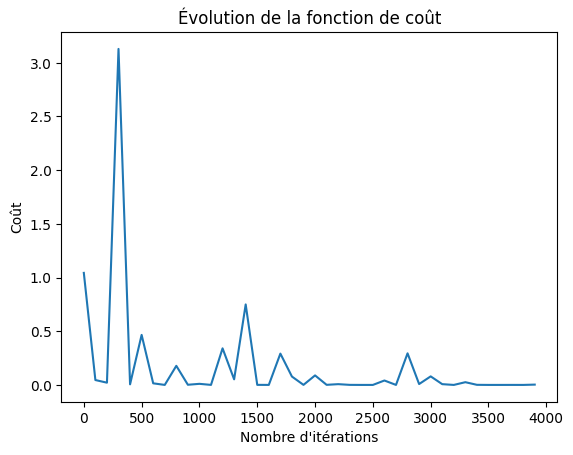

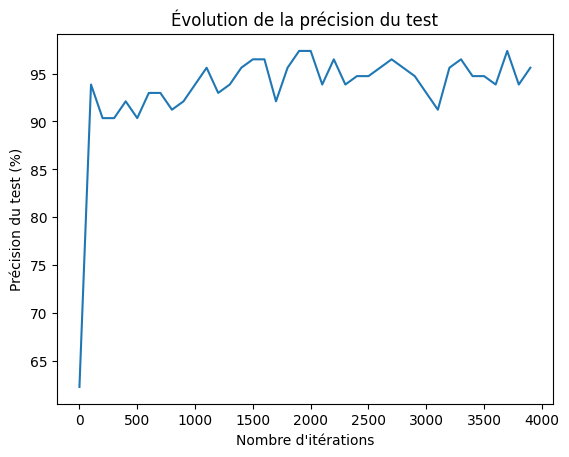

Le temps d'exécution de logistic_regression_SGD est de : 0.9529998860000148 secondes.


In [11]:
alpha = 0.9
iter = 4000
#Exécution de la régression logistique avec SGD
t1_start = perf_counter()
logistic_regression_SGD(x_train, y_train, x_test, y_test, alpha, iter)
t1_stop = perf_counter()

print(f"Le temps d'exécution de logistic_regression_SGD est de : {t1_stop - t1_start} secondes.")

### commentaires

- La figure de la fonction de coût montre qu'avant l'itération 1500, la fonction de coût présente des fluctuations sinusoïdales et instables. Cela peut indiquer que le processus d'optimisation n'a pas encore convergé et que les mises à jour des paramètres ne sont pas encore suffisamment précises.
Cependant, après l'itération 1500, la fonction de coût commence à diminuer de manière plus significative et à se rapprocher de zéro. Cela suggère que la descente de gradient stochastique a progressé et se rapproche d'une solution optimale.Il est important de noter que l'apparition de fluctuations sinusoïdales avant la convergence n'est pas nécessairement un problème. Ces fluctuations peuvent être dues à la nature stochastique du processus, où les échantillons sont sélectionnés aléatoirement à chaque itération. Tant que la fonction de coût diminue globalement au fil des itérations et se rapproche d'une valeur minimale, cela indique que l'optimisation progresse dans la bonne direction.

- La figure de la précision de test montre une augmentation initiale de la précision jusqu'à environ 94%. Cela indique que le modèle s'améliore au début de l'entraînement et parvient à bien classer les exemples de test, puis la précision de test reste dans une plage acceptable et satisfait aux critères de performance définis (90% et 97%), le modèle peut être considéré comme satisfaisant.

### 2éme essai :
Importance du taux d'apprentissage de la méthode du gradient stochastique

taux = 0.09 ; nombre_iterations = 4000

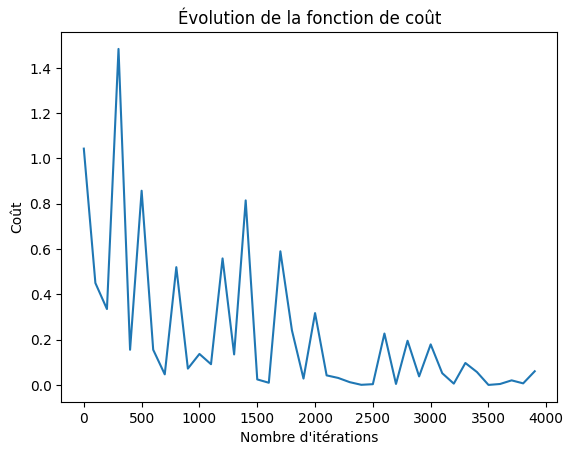

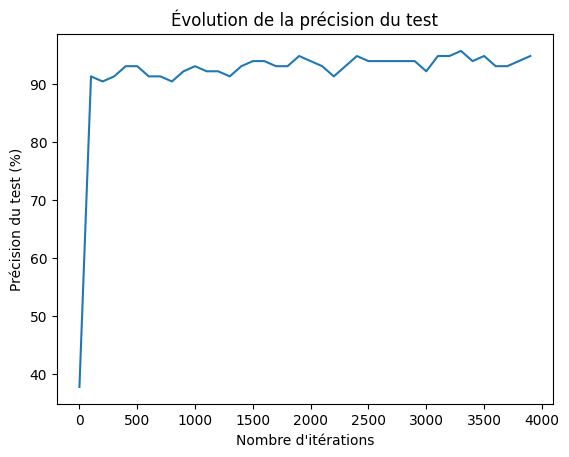

Le temps d'exécution de logistic_regression_SGD est de : 0.8230640349999874 secondes.


In [12]:
alpha = 0.09
iter = 4000
#Exécution de la régression logistique avec SGD
t1_start = perf_counter()
logistic_regression_SGD(x_train, y_train, x_test, y_test, alpha, iter)
t1_stop = perf_counter()

print(f"Le temps d'exécution de logistic_regression_SGD est de : {t1_stop - t1_start} secondes.")

## Tracer le nuage de points

In [13]:
# Utilisation du PCA (Analyse en composante principale) pour reduire la dimension en 2 dimensions pour visualiser le nuage de points
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train.T)
x_train_pca = pca.transform(x_train.T)
x_test_pca = pca.transform(x_test.T)

x_train_pca.shape


(455, 2)

In [14]:
# création du modèle en utilisant SGDClassifier
model = SGDClassifier(max_iter=4000, eta0=0.5, loss='log') # log c'est la fonction log vraissemblane
model.fit(x_train_pca, y_train) # entrainement du modele en utilaisant 2 caracteristiques
print(f'score: {(model.score(x_test_pca, y_test))*100}')

score: 92.10526315789474


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


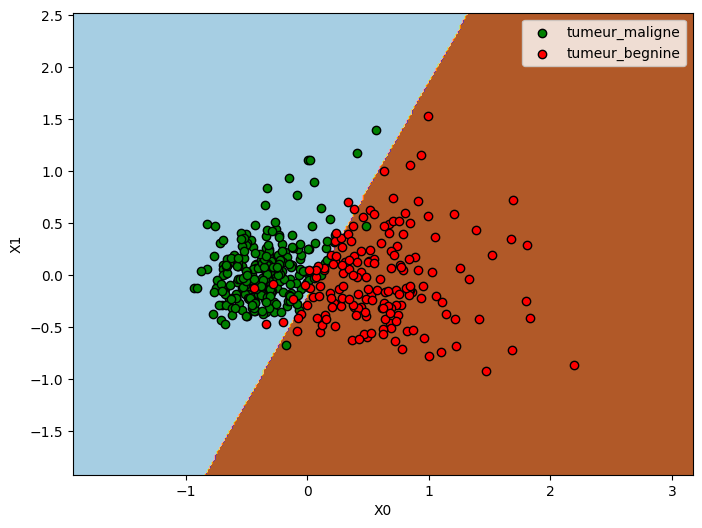

In [15]:
# Visualisation des données
plt.figure(num=None, figsize=(8, 6))


colors = "bry"
x_min, x_max = x_train_pca[:,0].min() - 1, x_train_pca[:,0].max() + 1
y_min, y_max = x_train_pca[:,1].min() - 1, x_train_pca[:,1].max() + 1
x1, y1 = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[x1.ravel(), y1.ravel()])
Z = Z.reshape(x1.shape)
cs = plt.contourf(x1, y1,Z, cmap=plt.cm.Paired)

plt.scatter(x_train_pca[y_train==0, 0], x_train_pca[y_train==0, 1], marker='o', c='green', edgecolors='k', label='tumeur_maligne')
plt.scatter(x_train_pca[y_train==1, 0], x_train_pca[y_train==1, 1], marker='o', c='red', edgecolors='k', label='tumeur_begnine')
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.axis('tight')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

# la figure représente un nuage de points avec deux classes : les tumeurs bénignes (en rouge) et malignes (en vert)
# la frontière de décision, tracée par le modèle, sépare les points en fonction de leur classe prédite

## Mettre les données sous forme d'un tableau numpy

In [16]:
# générer des données et les sauvegareder dans un tableau numpy pour faciliter le traval aux étudiants de M1

np.save('x_train.npy', x_train.T)
np.save('x_test.npy', x_test.T)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)